In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "svg"

Pressure-Entropy Test
======

This test considers a non-uniformly spaced set of particles, with a corresponding jump in energy for a supposedly 'constant' pressure -- note that this is not actually the case as the density around the central region at $x=25$ is not truly constant, once appopriately smoothed.

In [2]:
from sphtests import PressureEntropyData
import numpy as np
import matplotlib.pyplot as plt

First, we'll set up the positions in a similar way:

In [3]:
diff_right = -0.0

positions_left = [x/10. for x in range(70, 250)]
positions_right = [x + diff_right for x in range(26, 70)]
positions = positions_left + positions_right

Now we must consider the energies. This is fairly simple due to the way that we set up the positions:

In [4]:
energies_left = [1.0] * len(positions_left)
energies_right = [10.0] * len(positions_right)
energies = energies_left + energies_right

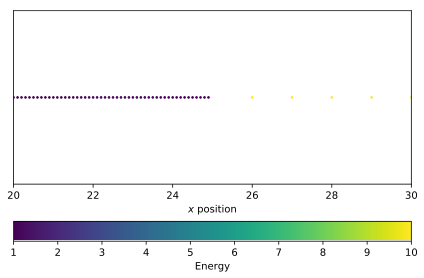

In [5]:
plt.scatter(positions, [0]*len(positions), c=energies, s=3)
plt.xlim(20, 30)
plt.xlabel("$x$ position")
plt.colorbar(orientation="horizontal", label="Energy")
plt.gca().axes.yaxis.set_visible(False)
plt.tight_layout()

Looks good! Now we can pass these to our SPH stuff:

(note that $\eta = 1.238$ is equivalent to 48 neighbors in 3D).

In [6]:
from sphtests.sph import gaussian_kernel as kernel
data = PressureEntropyData(positions, energies, eta=5, kernel=kernel)
plotmin = 20
plotmax = 30

Grabbing the GadgetData object
Calculating smoothing lengths


/Users/josh/Documents/sph1d/sphtests/sph.py:76: RuntimeWarning: divide by zero encountered in true_divide
  prefactor = 1/sqrt(2 * pi * sigma**2)
/Users/josh/Documents/sph1d/sphtests/sph.py:77: RuntimeWarning: divide by zero encountered in true_divide
  exponential = exp(-0.5 * (r / sigma)**2)
/Users/josh/Documents/sph1d/sphtests/sph.py:79: RuntimeWarning: invalid value encountered in multiply
  return prefactor * exponential
/Users/josh/Documents/sph1d/sphtests/sph.py:77: RuntimeWarning: invalid value encountered in true_divide
  exponential = exp(-0.5 * (r / sigma)**2)
/Users/josh/Documents/sph1d/sphtests/sph.py:77: RuntimeWarning: overflow encountered in square
  exponential = exp(-0.5 * (r / sigma)**2)


Calculating densities


/Users/josh/Documents/sph1d/sphtests/sph.py:77: RuntimeWarning: overflow encountered in double_scalars
  exponential = exp(-0.5 * (r / sigma)**2)


Calculating pressures
Starting Pressure-Entropy calculation
Minimising to find values of A
Difference: 3.3646335749745164
Difference: 0.23441940723107862
Difference: 0.018044142276606612
Difference: 0.0016962588380092514
Difference: 0.00018661918257786847
Difference: 2.158753296266358e-05
Difference: 2.491198142440254e-06
Difference: 2.887705946585939e-07
Difference: 3.370991888407282e-08
Calculating smoothed pressures
Calculating smoothed densities


Text(0.5,1,'Density Distribution')

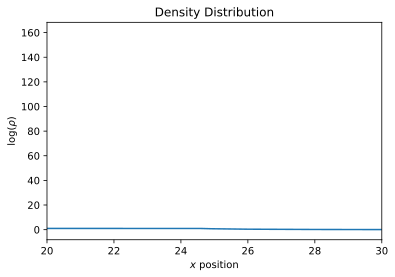

In [7]:
plt.plot(data.gadget.positions, np.log10(data.gadget.densities))
plt.xlim(plotmin, plotmax)
plt.ylabel(r"log($\rho$)")
plt.xlabel("$x$ position")
plt.title("Density Distribution")

Text(0.5,1,'GADGET Pressure Distribution')

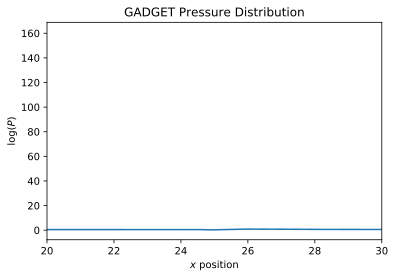

In [8]:
plt.plot(data.gadget.positions, np.log10(data.gadget.pressures))
plt.xlim(plotmin, plotmax)
plt.xlabel("$x$ position")
plt.ylabel("log($P$)")
plt.title("GADGET Pressure Distribution")

Text(0.5,1,'Internal Energy Distribution')

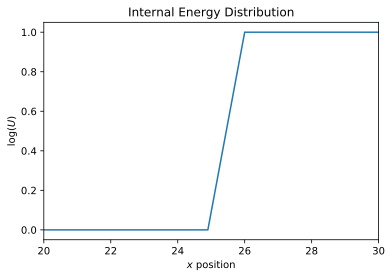

In [9]:
plt.plot(data.gadget.positions, np.log10(data.gadget.energies))
plt.xlim(plotmin, plotmax)
plt.xlabel("$x$ position")
plt.ylabel("log($U$)")
plt.title("Internal Energy Distribution")

Text(0.5,1,'Smoothing Length')

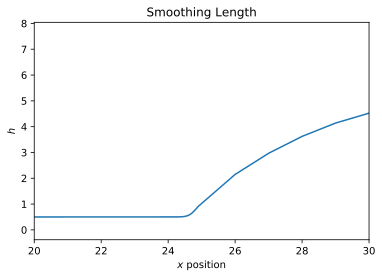

In [10]:
plt.plot(data.gadget.positions, data.gadget.smoothing_lengths)
plt.xlim(plotmin, plotmax)
plt.xlabel("$x$ position")
plt.ylabel("$h$")
plt.title("Smoothing Length")

Text(0.5,1,'Adiabat')

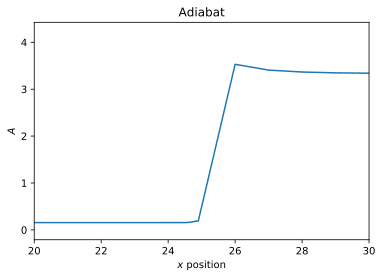

In [11]:
plt.plot(data.gadget.positions, data.adiabats)
plt.xlim(plotmin, plotmax)
plt.xlabel("$x$ position")
plt.ylabel("$A$")
plt.title("Adiabat")

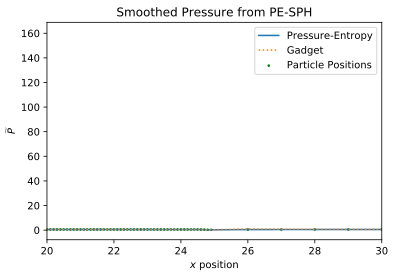

In [12]:
plt.scatter(data.gadget.positions, np.log10(data.smoothed_pressures), s=3, c="green", label="Particle Positions")
plt.plot(data.gadget.positions, np.log10(data.smoothed_pressures), label="Pressure-Entropy")
plt.plot(data.gadget.positions, np.log10(data.gadget.pressures), ls='dotted', label="Gadget")
plt.xlim(plotmin, plotmax)
plt.xlabel("$x$ position")
plt.ylabel("$\widetilde{P}$")
plt.title("Smoothed Pressure from PE-SPH")
plt.legend()